In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

start_time = time.time() # evaluate computational time

Download data and reindex from 1

In [3]:
# Download data
cities = pd.read_csv(r'C:\Users\Cristina\OneDrive\Documents\DSTI\Metaheuristics\Qatar.csv', delimiter=';') 
# start index at 1
cities.index = cities.index + 1

Function to calculate Distance (will be used further)

In [4]:
def distance(p1, p2):
    '''Returns Euclidean Distance between two points'''
    x1, y1 = p1 # first city in path
    x2, y2 = p2 # second city in path
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2) # calculate distance
    if d == 0:
        d = np.inf # to add a positive number
    return d

Make a list with coordinates (here points)

In [5]:
x=cities['X']
y=cities['Y']
points = list(zip(x,y))

Vizualize the points (cities)

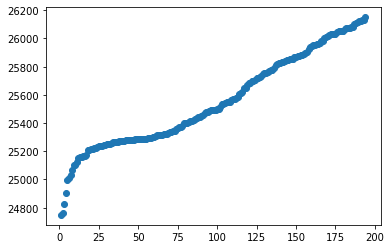

In [6]:
plt.scatter(x,y) 

Path function

In [7]:
class Path:
    def __init__(self, points): # for initialization
        self.points = points 
        self._create_path() # ordered set of points
    # Path Distance
    def __repr__(self):
        return 'Path Distance: {}'.format(round(self.distance, 3))
    # Number of path steps
    def __len__(self):
        return len(self.points)
    # return the path
    def copy(self):
        return Path(points = self.points)
    # create the path    
    def _create_path(self, return_=False):
        points = self.points.copy()
        _init = points.pop(0) # get first item as start
        p1 = tuple(_init) # make copy; it will be end as well
        path = [p1]
        d = 0 # initial distance
        for p2 in points:
            path.append(p2) # save the points
            d += distance(p1, p2) # update the distance
            p1 = p2 # update current location 
        path.append(_init) ## start == end
        d += distance(p1, _init)
        self.path = path
        self.distance = d
        
        if return_:
            return d, path # return distance and path
    
    def plot(self, i=''):
        x,y = list(zip(*self.points))
        plt.scatter(x, y, marker='x')
        a,b = list(zip(*self.path))
        plt.plot(a,b)
        plt.title('{} Distance: {}'.format(i,round(self.distance, 3)))

In [8]:
p = Path(points)
print('Initial', p)

Initial Path Distance: 2866.199


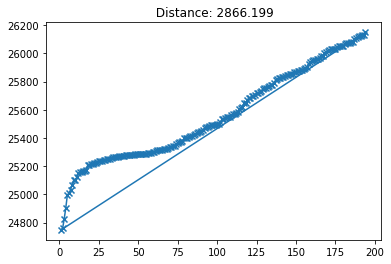

In [9]:
p.plot() # initial random potential route

## Simulated Annealing 

In [10]:
class SA:
    def __init__(self, points, T):
        self.points = random.sample(population=points, k=len(points)) ## reshuffle the cities
        self.T = T
        #self.func = func
    
    def solve(self, N=25):
        T = self.T
        path = Path(self.points)
        #plt.ion()
        iterations = np.arange(N)
        fitness = []
        best_path = path.copy()
        for it in iterations:
            points = self._rearrange(path.points.copy())
            prop = Path(points)
            hprop = prop.distance
            hcur = path.distance
            p = max(0, min(1, np.exp(-(hprop - hcur) / T)))
            if hcur > hprop: 
                p = 1
            if np.random.rand() < p:
                path = prop
            T = 0.95 * T
            fitness.append(path.distance)
            if best_path.distance > path.distance:
                best_path = path.copy()
            if it % 100 == 0 :
                plt.cla()
                path.plot('{} with p={}'.format(it, round(p,3)))
                plt.pause(0.15)
        plt.cla()
        best_path.plot()
        plt.pause(5)
        plt.cla()
        plt.plot(iterations, fitness)
        plt.xlabel('iterations')
        plt.ylabel('distance')
        plt.title('distance over time (lower is better)')
        plt.show()
        plt.pause(5)
        self.T = T
        return best_path
# Edit the path by taking a section of the path, reversing the order
# and placing it back in
   
    def _rearrange(self, points):
        stop = random.randint(1, len(points))
        start = random.randint(0, stop)
        points[start:stop] = reversed(points[start:stop])
        return points


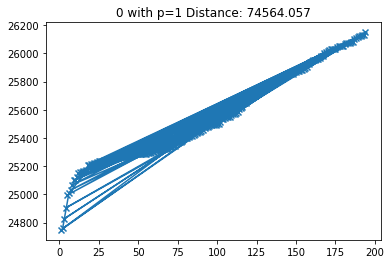

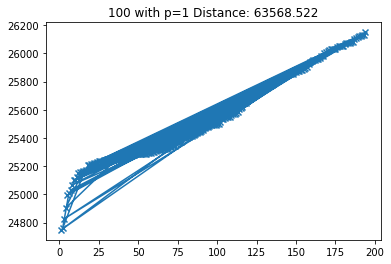

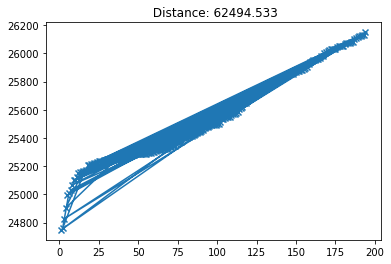

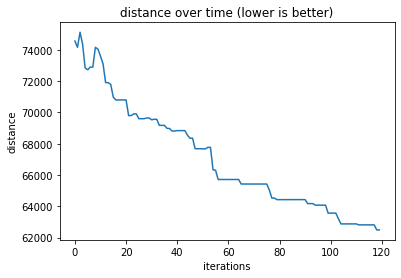

In [11]:
solver = SA(points = points, T = 1000)
solution = solver.solve(N=120)


Solution Path Distance: 62494.533 final temp 2.1
[(49, 25283.6111), (46, 25281.1111), (83, 25416.9444), (87, 25433.3333), (86, 25429.7222), (51, 25286.1111), (55, 25288.0556), (144, 25847.7778), (111, 25567.5), (76, 25368.6111), (152, 25872.5), (150, 25867.7778), (34, 25263.6111), (115, 25610.2778), (95, 25483.3333), (141, 25829.7222), (41, 25275.8333), (188, 26108.0556), (129, 25751.1111), (58, 25292.5), (94, 25480.5556), (53, 25286.6667), (22, 25223.3333), (131, 25758.3333), (92, 25469.7222), (40, 25270.8333), (27, 25235.5556), (98, 25495.0), (128, 25734.7222), (183, 26076.6667), (52, 25286.1111), (186, 26083.6111), (130, 25751.9444), (116, 25622.5), (101, 25500.8333), (102, 25510.5556), (89, 25444.4444), (91, 25459.1667), (113, 25585.5556), (153, 25880.8333), (139, 25823.6111), (97, 25492.2222), (14, 25162.2222), (105, 25538.8889), (9, 25100.0), (133, 25772.2222), (145, 25850.0), (151, 25871.9444), (125, 25716.6667), (3, 24827.2222), (109, 25560.2778), (8, 25067.7778), (180, 26055.0

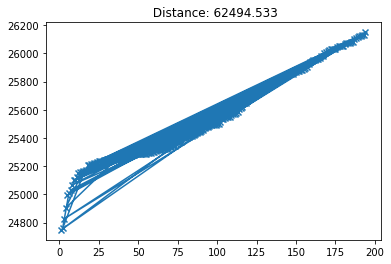

Solution found in : 79.37 seconds


In [12]:
solution.plot()
print('Solution', solution, 'final temp', round(solver.T, 1))
print(str(solution.path))
plt.show()
print("Solution found in : {:.2f} seconds".format(time.time()-start_time))  